In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
# numbers of rows and columns of dataset
print(dataset.shape)

(891, 12)


In [4]:
# detect missing values
print(dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# numbers of rows and columns of dataset
print(dataset.shape)

(891, 12)


In [6]:
# remove rows which have missing values
dataset.drop('Ticket', axis=1, inplace=True)
dataset.drop('Cabin', axis=1, inplace=True)
dataset.dropna(inplace=True)

In [7]:
# detect missing values again
print(dataset.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [8]:
# detect missing values again
print(dataset.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [9]:
# check ages of people
print(dataset['Age'].describe())


count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [10]:
# find median and IQR of Ages
print('Median:', dataset['Age'].median())
print('IQR:', dataset['Age'].quantile(q=0.75) - dataset['Age'].quantile(q=0.25))

Median: 28.0
IQR: 18.0


In [11]:
# check survival is adult or child
dataset['categorize_age'] = pd.Series()
for i in dataset.index:
    if dataset.loc[i, 'Age'] <= 16:
        dataset.at[i, 'category'] = 'child'
    elif dataset.loc[i, 'Age'] <= 25:
        dataset.at[i, 'category'] = 'young'
    elif dataset.loc[i, 'Age'] <= 60:
        dataset.at[i, 'category'] = 'adult'
    else:
        dataset.at[i, 'category'] = 'old'

In [ ]:
# numbers of survivals based on age category
print(dataset['category'].value_counts())

category
adult    390
young    201
child    100
old       21
Name: count, dtype: int64


In [ ]:
print(dataset['Survived'].value_counts())

Survived
0    424
1    288
Name: count, dtype: int64


In [ ]:
dataset['Pclass'] = dataset['Pclass'].astype(int)
dataset['Pclass'].dtype

dtype('int64')

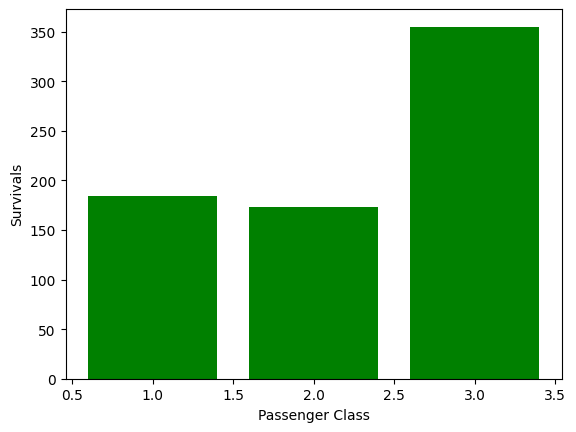

Pclass
3    355
1    184
2    173
Name: count, dtype: int64

In [ ]:

passenger_class_distribution = dataset['Pclass'].value_counts().sort_index()
plt.bar(passenger_class_distribution.index, passenger_class_distribution.values, color='green')
plt.xlabel('Passenger Class')
plt.ylabel('Survivals')
plt.show()

dataset['Pclass'].value_counts()


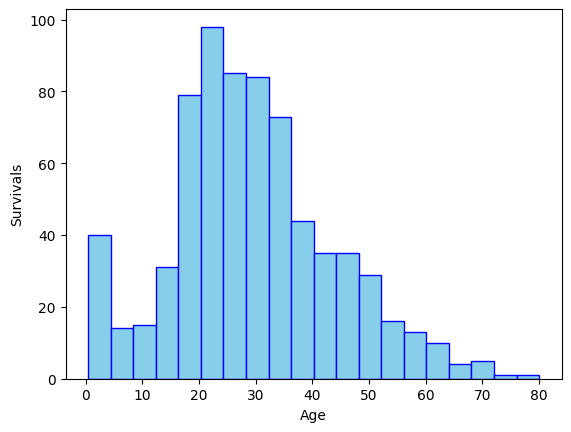

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 712, dtype: float64

In [ ]:
plt.hist(dataset['Age'], bins=20, color = 'skyblue', edgecolor = 'blue')
plt.xlabel('Age')
plt.ylabel('Survivals')
plt.show()

dataset['Age']

category  child  young  adult  old
Age                               
0.42          1      0      0    0
0.67          1      0      0    0
0.75          2      0      0    0
0.83          2      0      0    0
0.92          1      0      0    0
...         ...    ...    ...  ...
70.00         0      0      0    2
70.50         0      0      0    1
71.00         0      0      0    2
74.00         0      0      0    1
80.00         0      0      0    1

[88 rows x 4 columns]
Axes(0.125,0.11;0.775x0.77)


712

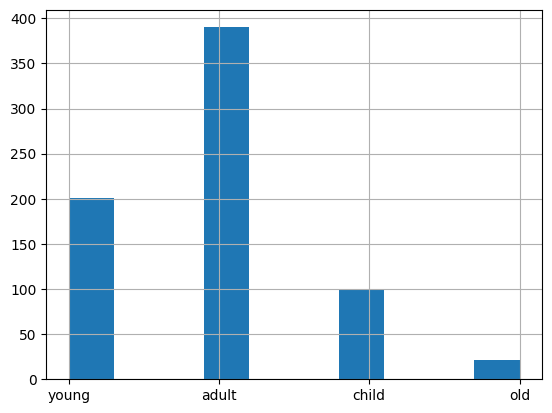

In [ ]:
cross_table_ages = pd.crosstab(dataset['Age'], dataset['category']).reindex(['child', 'young', 'adult', 'old'], axis=1)
print(cross_table_ages)
print(dataset['category'].hist())
dataset['category'].count()


<Axes: xlabel='Age', ylabel='Count'>

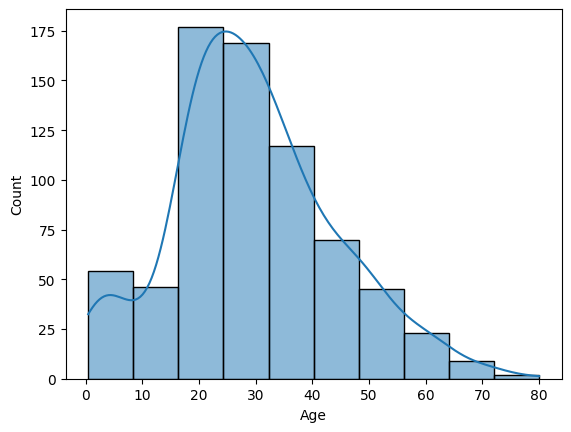

In [ ]:
sns.histplot(dataset['Age'], kde=True, bins=10)

<Axes: xlabel='Age', ylabel='Percent'>

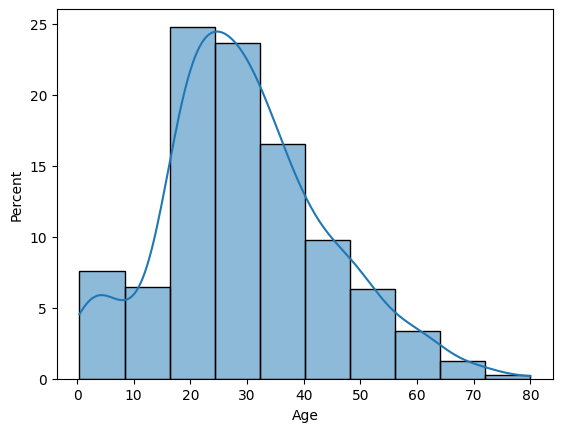

In [ ]:
sns.histplot(dataset['Age'], kde=True, bins = 10, stat='percent')

Survival Rate by Age Category:
Survived         0         1
category                    
adult     0.589744  0.410256
child     0.450000  0.550000
old       0.809524  0.190476
young     0.656716  0.343284
category
adult    0.410256
child    0.550000
old      0.190476
young    0.343284
Name: 1, dtype: float64


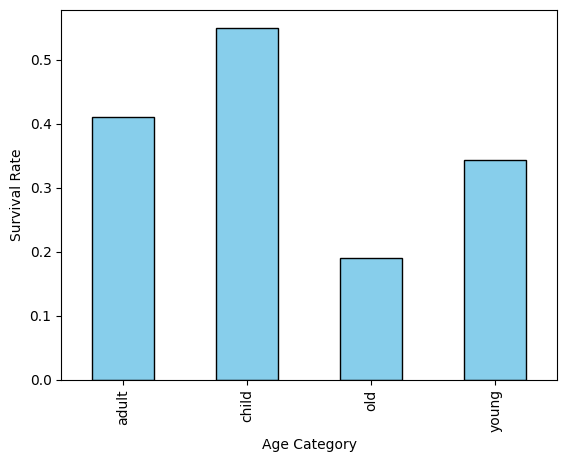

In [19]:
survival_by_category = pd.crosstab(dataset['category'], dataset['Survived'])
survival_rate_by_category = survival_by_category.div(survival_by_category.sum(axis=1), axis=0)

# Print the survival rate for each age category
print("Survival Rate by Age Category:")
print(survival_rate_by_category)
print(survival_rate_by_category[1])

# Plot the survival rate by age category (0 = Dead, 1 = Alive)
survival_rate_by_category[1].plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Age Category')
plt.ylabel('Survival Rate')
plt.show()

Survival Rate by gender:
Survived         0         1
Sex                         
female    0.247104  0.752896
male      0.794702  0.205298


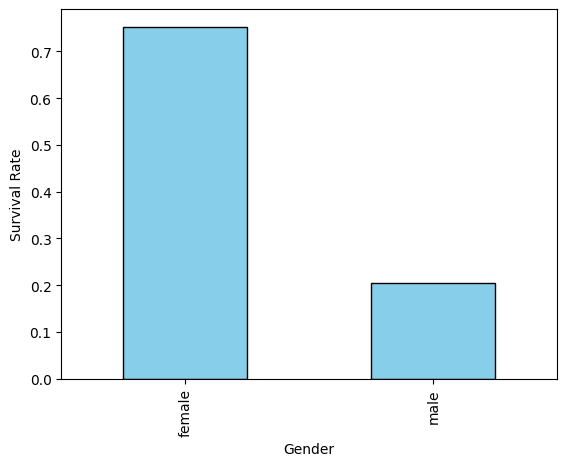

In [20]:
survival_by_gender = pd.crosstab(dataset['Sex'], dataset['Survived'])
survival_rate_by_gender = survival_by_gender.div(survival_by_gender.sum(axis=1), axis=0)

print("Survival Rate by gender:")
print(survival_rate_by_gender)

survival_rate_by_gender[1].plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()